# Networkx
- comprehensive graph package
- analyse social networks
- [algorithms](http://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.html)
- [drawing techniques](http://networkx.github.io/documentation/networkx-1.9.1/reference/drawing.html)
- Note - must install [graphviz](http://www.graphviz.org) to draw
graphs(it does the layout)

In [1]:
# Graph types networkx knows about

import networkx as nx

[s for s in dir(nx) if s.endswith('graph')]

['LCF_graph',
 'barabasi_albert_graph',
 'barbell_graph',
 'binomial_graph',
 'bull_graph',
 'caveman_graph',
 'chordal_cycle_graph',
 'chvatal_graph',
 'circulant_graph',
 'circular_ladder_graph',
 'complete_bipartite_graph',
 'complete_graph',
 'complete_multipartite_graph',
 'connected_caveman_graph',
 'connected_watts_strogatz_graph',
 'cubical_graph',
 'cycle_graph',
 'davis_southern_women_graph',
 'dense_gnm_random_graph',
 'desargues_graph',
 'diamond_graph',
 'digraph',
 'directed_havel_hakimi_graph',
 'dodecahedral_graph',
 'dorogovtsev_goltsev_mendes_graph',
 'duplication_divergence_graph',
 'ego_graph',
 'empty_graph',
 'erdos_renyi_graph',
 'expected_degree_graph',
 'fast_gnp_random_graph',
 'florentine_families_graph',
 'frucht_graph',
 'gaussian_random_partition_graph',
 'general_random_intersection_graph',
 'geographical_threshold_graph',
 'gn_graph',
 'gnc_graph',
 'gnm_random_graph',
 'gnp_random_graph',
 'gnr_graph',
 'graph',
 'grid_2d_graph',
 'grid_graph',
 'havel_

Largest eigenvalue: 1.59544470268
Smallest eigenvalue: 1.49691260389e-16


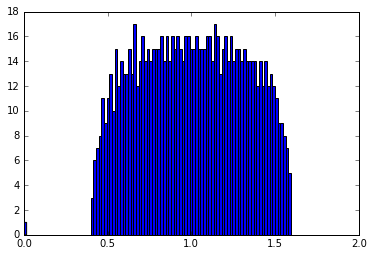

In [2]:
%matplotlib inline
"""
Create an G{n,m} random graph and compute the eigenvalues.
Requires numpy and matplotlib.
"""
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt

n = 1000 # 1000 nodes
m = 5000 # 5000 edges
G = nx.gnm_random_graph(n,m)

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e,bins=100) # histogram with 100 bins
plt.xlim(0,2)  # eigenvalues between 0 and 2
plt.show()

In [ ]:
"""
Example using unicode strings as graph labels.

Also shows creative use of the Heavy Metal Umlaut:
http://en.wikipedia.org/wiki/Heavy_metal_umlaut

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = ""
__credits__ = """"""
__revision__ = ""
#    Copyright (C) 2006 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

%matplotlib inline

import networkx as NX
try:
    import pylab as P
except ImportError:
    pass

try:
    hd='H' + unichr(252) + 'sker D' + unichr(252)
    mh='Mot' + unichr(246) + 'rhead'
    mc='M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st='Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q='Queensr' + unichr(255) + 'che'
    boc='Blue ' + unichr(214) +'yster Cult'
    dt='Deatht' + unichr(246) + 'ngue'
except NameError:
    hd='H' + chr(252) + 'sker D' + chr(252)
    mh='Mot' + chr(246) + 'rhead'
    mc='M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st='Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q='Queensr' + chr(255) + 'che'
    boc='Blue ' + chr(214) +'yster Cult'
    dt='Deatht' + chr(246) + 'ngue'

G=NX.Graph()
G.add_edge(hd,mh)
G.add_edge(mc,st)
G.add_edge(boc,mc)
G.add_edge(boc,dt)
G.add_edge(st,dt)
G.add_edge(q,st)
G.add_edge(dt,mh)
G.add_edge(st,mh)

path = '/tmp/edgelist.utf-8'
# write in UTF-8 encoding
with open(path,'wb') as fd:
    fd.write('# -*- coding: utf-8 -*-\n'.encode('utf-8')) 
    NX.write_multiline_adjlist(G,fd,delimiter='\t', encoding = 'utf-8')

# read and store in UTF-8
with open(path,'rb') as fd:
    H=NX.read_multiline_adjlist(fd ,delimiter='\t', encoding = 'utf-8')

for n in G.nodes():
    if n not in H:
        print(False)

print(G.nodes())

try:
    pos=NX.spring_layout(G)
    NX.draw(G,pos,font_size=16,with_labels=False)
    for p in pos: # raise text positions
        pos[p][1]+=0.07
    NX.draw_networkx_labels(G,pos)
    P.show()
except:
    pass

In [4]:
"""
Digraphs from Integer-valued Iterated Functions
===============================================


Sums of cubes on 3N
-------------------

The number 153 has a curious property.

Let 3N={3,6,9,12,...} be the set of positive multiples of 3.  Define an
iterative process f:3N->3N as follows: for a given n, take each digit
of n (in base 10), cube it and then sum the cubes to obtain f(n).

When this process is repeated, the resulting series n, f(n), f(f(n)),...
terminate in 153 after a finite number of iterations (the process ends
because 153 = 1**3 + 5**3 + 3**3).

In the language of discrete dynamical systems, 153 is the global
attractor for the iterated map f restricted to the set 3N.

For example: take the number 108

f(108) = 1**3 + 0**3 + 8**3 = 513

and

f(513) = 5**3 + 1**3 + 3**3 = 153

So, starting at 108 we reach 153 in two iterations,
represented as:

108->513->153

Computing all orbits of 3N up to 10**5 reveals that the attractor
153 is reached in a maximum of 14 iterations. In this code we
show that 13 cycles is the maximum required for all integers (in 3N)
less than 10,000.

The smallest number that requires 13 iterations to reach 153, is 177, i.e.,

177->687->1071->345->216->225->141->66->432->99->1458->702->351->153

The resulting large digraphs are useful for testing network software.

The general problem
-------------------

Given numbers n, a power p and base b, define F(n; p, b) as the sum of
the digits of n (in base b) raised to the power p. The above example
corresponds to f(n)=F(n; 3,10), and below F(n; p, b) is implemented as
the function powersum(n,p,b). The iterative dynamical system defined by
the mapping n:->f(n) above (over 3N) converges to a single fixed point;
153. Applying the map to all positive integers N, leads to a discrete
dynamical process with 5 fixed points: 1, 153, 370, 371, 407. Modulo 3
those numbers are 1, 0, 1, 2, 2. The function f above has the added
property that it maps a multiple of 3 to another multiple of 3; i.e. it
is invariant on the subset 3N.


The squaring of digits (in base 10) result in cycles and the
single fixed point 1. I.e., from a certain point on, the process
starts repeating itself.

keywords: "Recurring Digital Invariant", "Narcissistic Number",
"Happy Number"

The 3n+1 problem
----------------

There is a rich history of mathematical recreations
associated with discrete dynamical systems.  The most famous
is the Collatz 3n+1 problem. See the function
collatz_problem_digraph below. The Collatz conjecture
--- that every orbit returrns to the fixed point 1 in finite time
--- is still unproven. Even the great Paul Erdos said "Mathematics
is not yet ready for such problems", and offered $500
for its solution.

keywords: "3n+1", "3x+1", "Collatz problem", "Thwaite's conjecture"


"""
from networkx import *
from math import *


nmax=10000
p=3
mach_eps=0.00000000001

def digitsrep(n,b=10):
    """Return list of digits comprising n represented in base b.
    n must be a nonnegative integer"""

    # very inefficient if you only work with base 10
    dlist=[]
    if n<=0:
        return [0]
    maxpow=int(floor( log(n)/log(b) + mach_eps ))
    pow=maxpow
    while pow>=0:
        x=int(floor(n // b**pow))
        dlist.append(x)
        n=n-x*b**pow
        pow=pow-1
    return dlist

def powersum(n,p,b=10):
    """Return sum of digits of n (in base b) raised to the power p."""
    dlist=digitsrep(n,b)
    sum=0
    for k in dlist:
        sum+=k**p
    return sum

def attractor153_graph(n,p,multiple=3,b=10):
    """Return digraph of iterations of powersum(n,3,10)."""
    G=DiGraph()
    for k in range(1,n+1):
        if k%multiple==0 and k not in G:
            k1=k
            knext=powersum(k1,p,b)
            while k1!=knext:
                G.add_edge(k1,knext)
                k1=knext
                knext=powersum(k1,p,b)
    return G

def squaring_cycle_graph_old(n,b=10):
    """Return digraph of iterations of powersum(n,2,10)."""
    G=DiGraph()
    for k in range(1,n+1):
        k1=k
        G.add_node(k1) # case k1==knext, at least add node
        knext=powersum(k1,2,b)
        G.add_edge(k1,knext)
        while k1!=knext: # stop if fixed point
             k1=knext
             knext=powersum(k1,2,b)
             G.add_edge(k1,knext)
             if G.out_degree(knext) >=1:
                 # knext has already been iterated in and out
                 break
    return G

def sum_of_digits_graph(nmax,b=10):
    def f(n): return powersum(n,1,b)
    return discrete_dynamics_digraph(nmax,f)

def squaring_cycle_digraph(nmax,b=10):
    def f(n): return powersum(n,2,b)
    return discrete_dynamics_digraph(nmax,f)

def cubing_153_digraph(nmax):
    def f(n): return powersum(n,3,10)
    return discrete_dynamics_digraph(nmax,f)

def discrete_dynamics_digraph(nmax,f,itermax=50000):
    G=DiGraph()
    for k in range(1,nmax+1):
        kold=k
        G.add_node(kold)
        knew=f(kold)
        G.add_edge(kold,knew)
        while kold!=knew and kold<<itermax:
        # iterate until fixed point reached or itermax is exceeded
            kold=knew
            knew=f(kold)
            G.add_edge(kold,knew)
            if G.out_degree(knew) >=1:
               # knew has already been iterated in and out
               break
    return G

def collatz_problem_digraph(nmax):
    def f(n):
        if n%2==0:
            return n // 2
        else:
            return 3*n+1
    return discrete_dynamics_digraph(nmax,f)

def fixed_points(G):
    """Return a list of fixed points for the discrete dynamical
    system represented by the digraph G.
    """
    return [n for n in G if G.out_degree(n)==0]


if True:
    nmax=10000
    print("Building cubing_153_digraph(%d)"% nmax)
    G=cubing_153_digraph(nmax)
    print("Resulting digraph has", len(G), "nodes and",
          G.size()," edges")
    print("Shortest path from 177 to 153 is:")
    print(shortest_path(G,177,153))
    print("fixed points are %s" % fixed_points(G))

Building cubing_153_digraph(10000)
Resulting digraph has 10000 nodes and 10000  edges
Shortest path from 177 to 153 is:
[177, 687, 1071, 345, 216, 225, 141, 66, 432, 99, 1458, 702, 351, 153]
fixed points are []
